In [49]:
import pandas as pd
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

In [50]:
def compute_result(model,data,text):
    y_pred = model.fit_predict(data)
    plt.subplot(223)
    plt.scatter(data[:, 0], data[:, 1], c=y_pred)
    plt.title(text)
    print("silhouette_score: ",metrics.silhouette_score(data, y_pred))
    print("davies_bouldin_score: ",metrics.davies_bouldin_score(data, y_pred))


In [51]:
df = pd.read_csv("dataset.csv")

In [52]:
df = df.drop(['SystemCodeNumber','LastUpdated'],axis=1)
df.head()

,Capacity,Occupancy
0,577,61
1,577,64
2,577,80
3,577,107
4,577,150


In [53]:
mms = MinMaxScaler()
mms.fit(df)
data_transformed = mms.transform(df)
Train,Test = train_test_split(data_transformed)

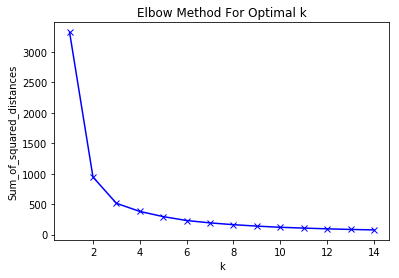

In [54]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

silhouette_score:  0.676613738309214
davies_bouldin_score:  0.6508080413699342


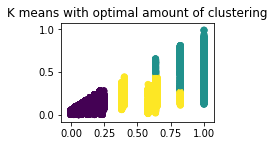

In [55]:
# K-means shows great silhouette_score (close to 1) but creates
# not the clusters that wer eally wanted

compute_result(KMeans(n_clusters=3),Train,"K means with optimal amount of clustering")

In [ ]:
# DBSCAN gives worse scores on on two of uor mesurements, but
# overal clustering picture is much better
# DBSCAN Found each line as a separete cluster.
compute_result(DBSCAN(eps=0.1, min_samples=2),Train,"DBSCAN clustering")